In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/jaissonjpp/image_processing/refs/heads/main/img_ufpa1.jpg


--2024-10-04 20:02:48--  https://raw.githubusercontent.com/jaissonjpp/image_processing/refs/heads/main/img_ufpa1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 691276 (675K) [image/jpeg]
Saving to: ‘img_ufpa1.jpg’

img_ufpa1.jpg       100%[===================>] 675.07K  --.-KB/s    in 0.04s   

2024-10-04 20:02:49 (14.8 MB/s) - ‘img_ufpa1.jpg’ saved [691276/691276]



criar um filtro que crie um padrão mosaico de bayer na imagem

In [ ]:
img = Image.open('img_ufpa1.jpg')
img_array = np.array(img)
print(f'{img_array.shape=} {img_array.dtype=}')

# Ensure dimensions are even
height, width, _ = img_array.shape
height -= height % 2
width -= width % 2
img_array = img_array[:height, :width]

def create_bayer_mask(height, width):
    # Cria o padrão básico 2x2 do filtro Bayer para i canal vermelho 25%
    bayer_pattern_r = np.array([
        [0, 0],
        [0, 1]
    ])
    # Cria o padrão básico 2x2 do filtro Bayer para i canal verde 50%
    bayer_pattern_g = np.array([
        [0, 1],
        [1, 0]
    ])
    # Cria o padrão básico 2x2 do filtro Bayer para i canal azul 25%
    bayer_pattern_b = np.array([
        [1, 0],
        [0, 0]
    ])
    def expand_padrao(pattern, height, width):
        # Repete o padrão para cobrir toda a imagem
        bayer_mask = np.tile(pattern, (height // 2+1, width // 2+1))
        # Se as dimensões são ímpares, corta o excesso
        return bayer_mask[:height, :width]
    bayer_filter_r = expand_padrao(bayer_pattern_r, height, width)
    bayer_filter_g = expand_padrao(bayer_pattern_g, height, width)
    bayer_filter_b = expand_padrao(bayer_pattern_b, height, width)
    bayer_filter=np.dstack((bayer_filter_r, bayer_filter_g, bayer_filter_b))
    bayer_filter = bayer_filter.astype(np.uint8)
    return bayer_filter

bayer_filter=create_bayer_mask(img_array.shape[0], img_array.shape[1])

img_array_bayer = img_array * bayer_filter
#Image.fromarray(img).save('img_ufpa1_bayer.jpg')


def demosaicing_bayer(img_array):
    height, width, _ = img_array.shape
    demosaiced_img = np.zeros((height, width, 3), dtype=np.uint8)

    # Interpolação para o canal vermelho
    demosaiced_img[0::2, 0::2, 0] = img_array[0::2, 0::2, 0]
    demosaiced_img[1::2, 0::2, 0] = img_array[0::2, 0::2, 0]
    demosaiced_img[0::2, 1::2, 0] = img_array[0::2, 0::2, 0]
    demosaiced_img[1::2, 1::2, 0] = img_array[0::2, 0::2, 0]

    # Interpolação para o canal azul
    demosaiced_img[1::2, 1::2, 2] = img_array[1::2, 1::2, 2]
    demosaiced_img[0::2, 1::2, 2] = img_array[1::2, 1::2, 2]
    demosaiced_img[1::2, 0::2, 2] = img_array[1::2, 1::2, 2]
    demosaiced_img[0::2, 0::2, 2] = img_array[1::2, 1::2, 2]

    # Interpolação para o canal verde
    demosaiced_img[0::2, 1::2, 1] = img_array[0::2, 1::2, 1]
    demosaiced_img[1::2, 0::2, 1] = img_array[1::2, 0::2, 1]
    demosaiced_img[0::2, 0::2, 1] = (img_array[0::2, 1::2, 1] + img_array[1::2, 0::2, 1]) // 2
    demosaiced_img[1::2, 1::2, 1] = (img_array[0::2, 1::2, 1] + img_array[1::2, 0::2, 1]) // 2

    return demosaiced_img

demosaiced_img = demosaicing_bayer(img_array_bayer)
Image.fromarray(demosaiced_img).save('img_ufpa1_demosaiced.jpg')

# Calcule a diferença quadrada entre as imagens
squared_diff = (img_array  - demosaiced_img ) ** 2

# Calcule a média da diferença quadrada
mse = np.mean(squared_diff)

# Imprima o resultado
print("MSE:", mse)

img_array.shape=(1799, 1440, 3) img_array.dtype=dtype('uint8')
MSE: 77.66375203415318


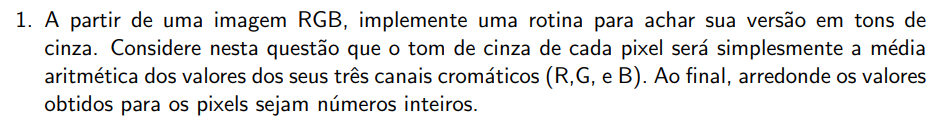

In [ ]:

def rgb_to_grayscale(image_path, output_path):
    # Carregar a imagem RGB
    img = Image.open(image_path)

    # Converter a imagem para um array NumPy
    img_array = np.array(img)

    # Calcular a média aritmética dos três canais (R, G, B)
    gray_array = img_array.mean(axis=2)

    # Arredondar os valores para inteiros
    gray_array = np.round(gray_array).astype(np.uint8)

    # Converter o array de volta para uma imagem
    gray_img = Image.fromarray(gray_array)

    # Salvar a imagem em tons de cinza
    gray_img.save(output_path)

# Exemplo de uso
rgb_to_grayscale('img_ufpa1.jpg', 'img_ufpa1_gray.jpg')

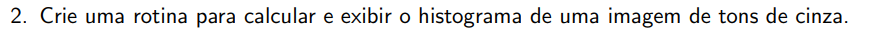

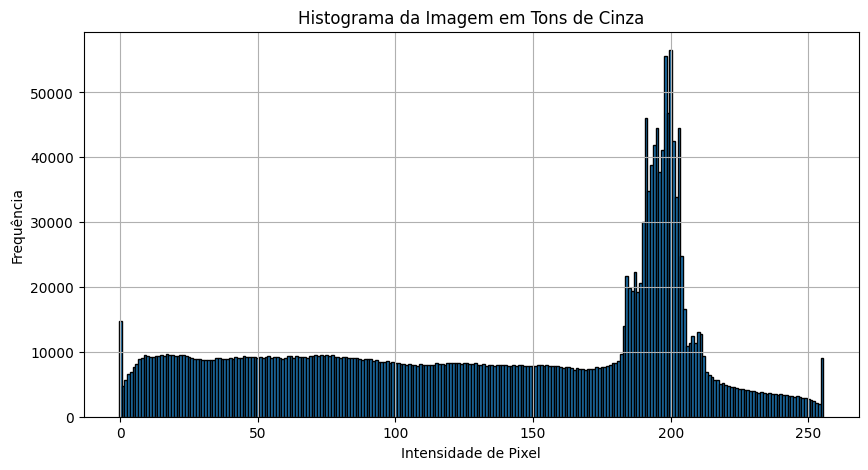

In [ ]:

def calculate_histogram(image_path):
    # Carregar a imagem em tons de cinza
    img = Image.open(image_path).convert('L')

    # Inicializar o histograma com zeros
    histogram = [0] * 256

    # Obter os pixels da imagem
    pixels = img.getdata()

    # Calcular o histograma
    for pixel in pixels:
        histogram[pixel] += 1

    return histogram

def display_histogram(histogram):
    # Exibir o histograma
    plt.figure(figsize=(10, 5))
    plt.bar(range(256), histogram, width=1, edgecolor='black')
    plt.title('Histograma da Imagem em Tons de Cinza')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

histogram = calculate_histogram('img_ufpa1_gray.jpg')
display_histogram(histogram)

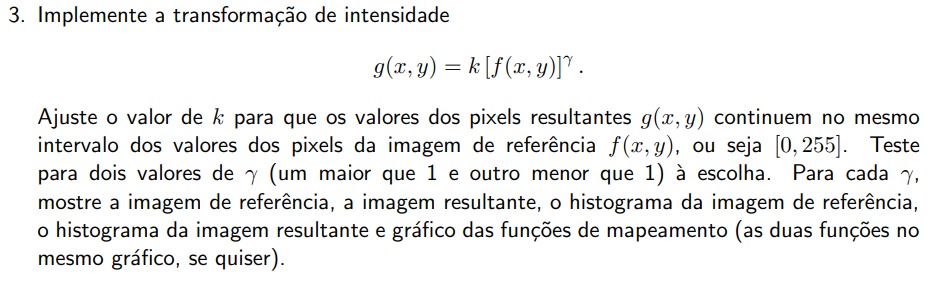

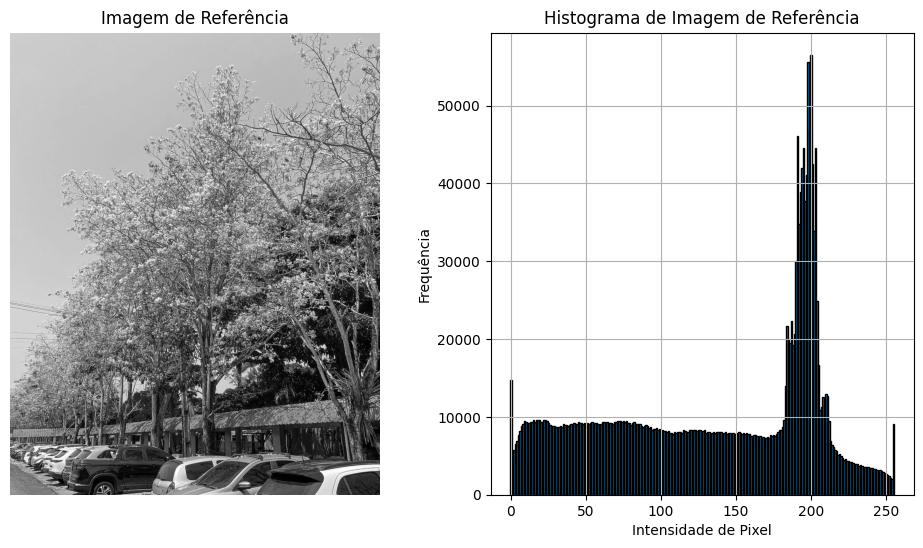

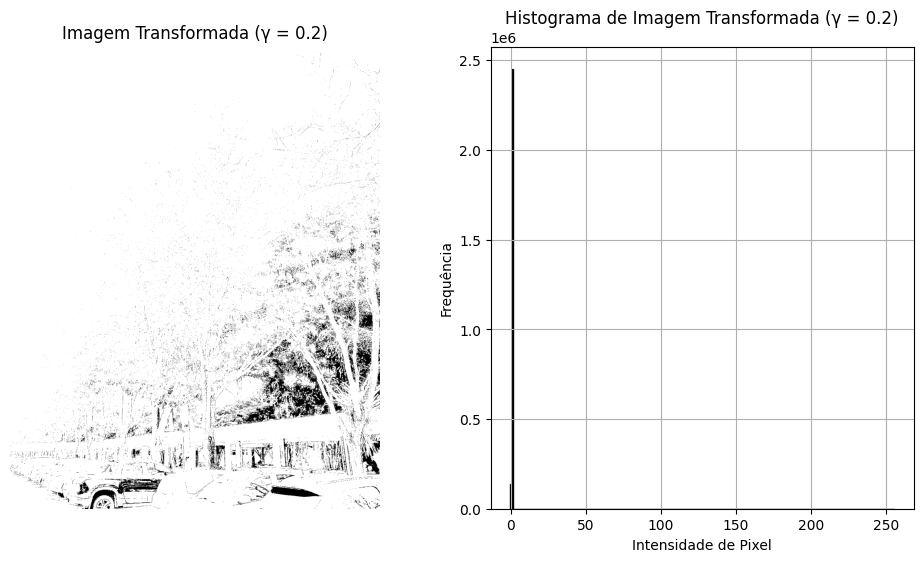

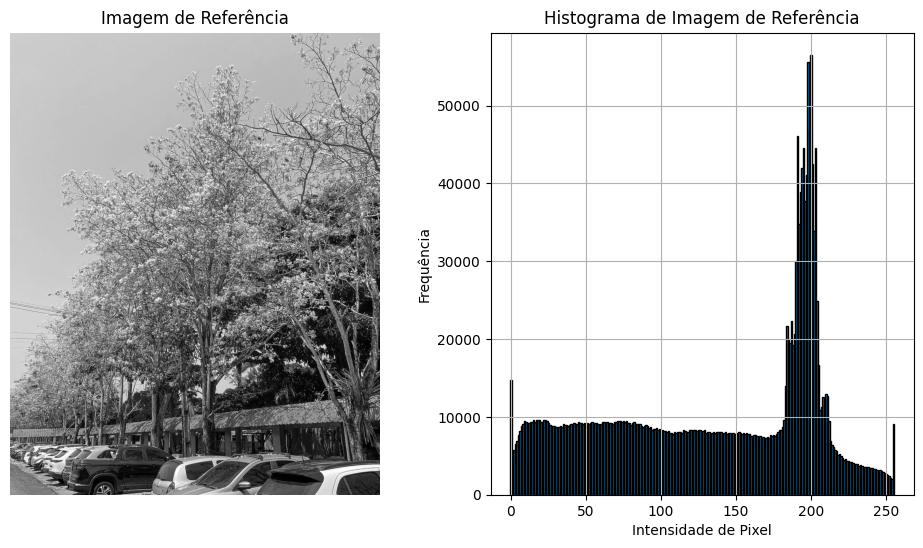

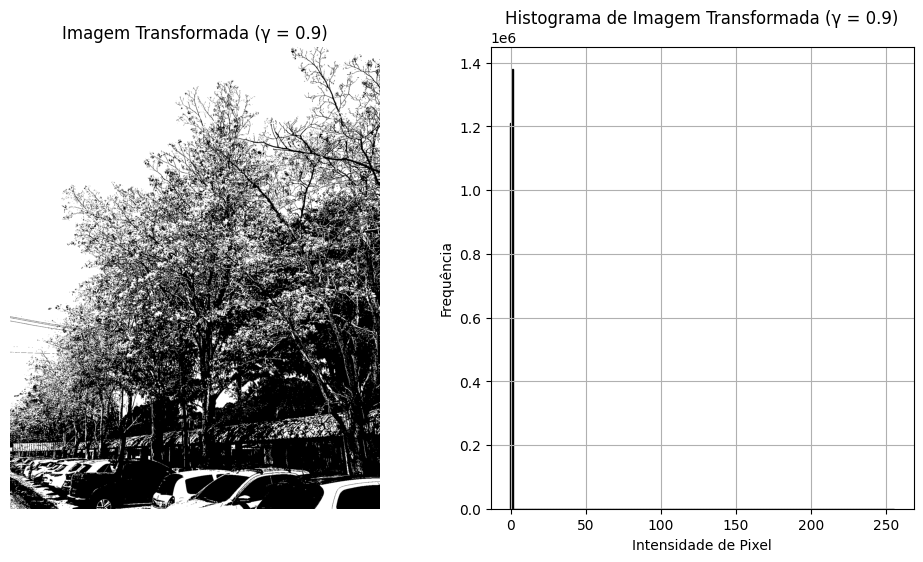

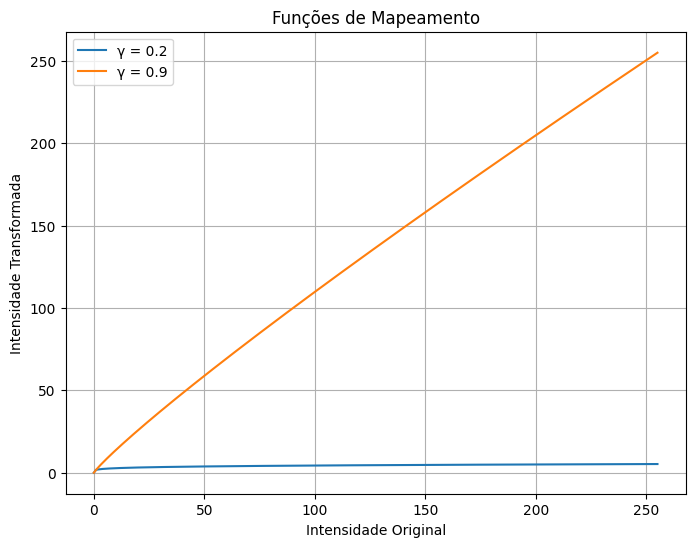

In [ ]:
def apply_intensity_transformation(image_array, gamma, k):
    # Aplicar a transformação de intensidade
    transformed_array = k * (image_array ** gamma)

    # Normalizar os valores para o intervalo [0, 255]
    transformed_array = np.clip(transformed_array, 0, 255)

    return transformed_array.astype(np.uint8)

def calculate_histogram(image_array):
    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=(0, 256))
    return histogram

def display_image_and_histogram(image_array, title):
    plt.figure(figsize=(12, 6))

    # Mostrar a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Calcular e mostrar o histograma
    histogram = calculate_histogram(image_array)
    plt.subplot(1, 2, 2)
    plt.bar(range(256), histogram, width=1, edgecolor='black')
    plt.title(f'Histograma de {title}')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Frequência')
    plt.grid(True)

    plt.show()

def plot_mapping_functions(gammas, k):
    x = np.linspace(0, 255, 256)
    plt.figure(figsize=(8, 6))
    for gamma in gammas:
        y = k * (x ** gamma)
        plt.plot(x, y, label=f'γ = {gamma}')
    plt.title('Funções de Mapeamento')
    plt.xlabel('Intensidade Original')
    plt.ylabel('Intensidade Transformada')
    plt.legend()
    plt.grid(True)
    plt.show()

# Carregar a imagem de referência
image_path = 'img_ufpa1_gray.jpg'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Definir os valores de γ e k
gammas = [0.2, 0.9]
k = 255 / (255 ** max(gammas))

# Aplicar a transformação de intensidade para cada γ
for gamma in gammas:
    transformed_array = apply_intensity_transformation(img_array / 255.0, gamma, k)

    # Exibir a imagem de referência e a imagem resultante
    display_image_and_histogram(img_array, 'Imagem de Referência')
    display_image_and_histogram(transformed_array, f'Imagem Transformada (γ = {gamma})')

# Plotar as funções de mapeamento
plot_mapping_functions(gammas, k)


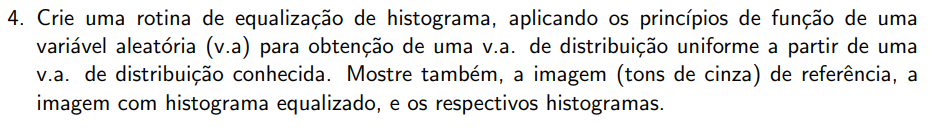

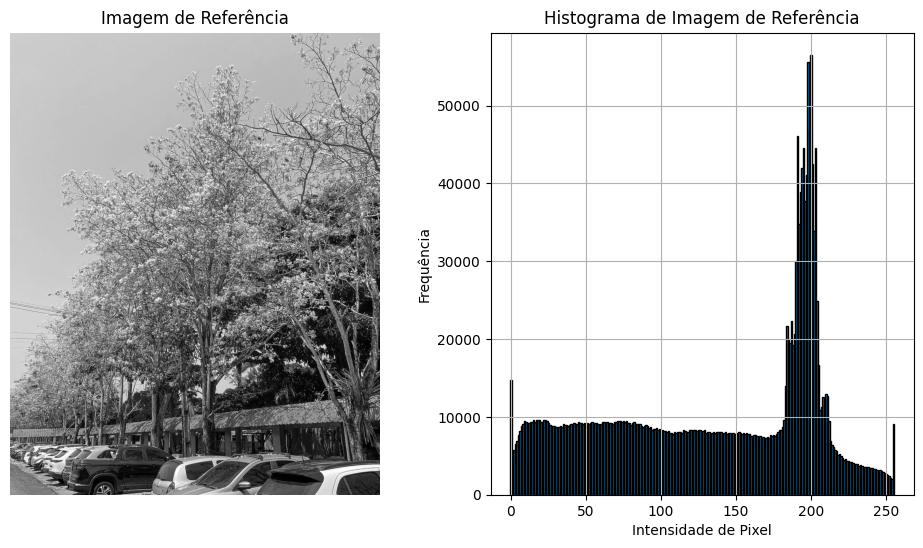

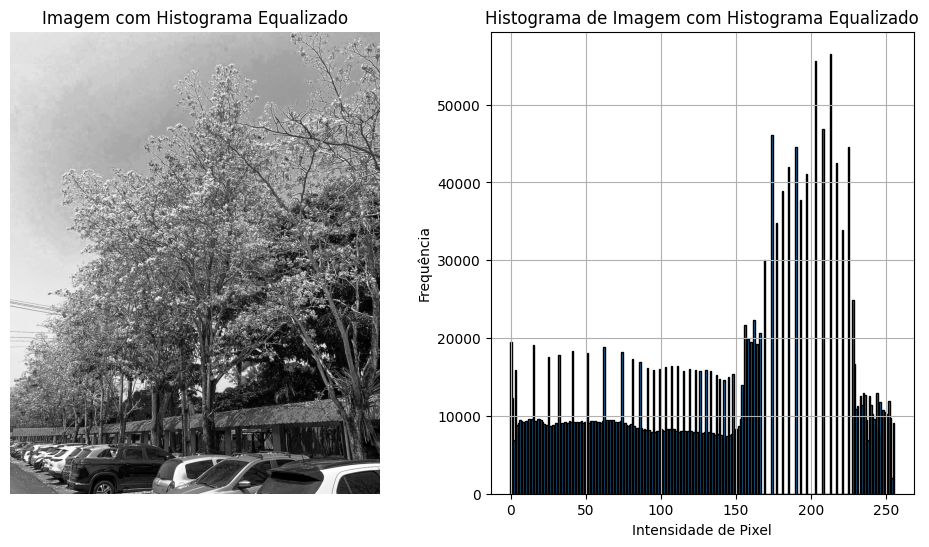

In [ ]:
def calculate_histogram(image_array):
    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=(0, 256))
    return histogram

def calculate_cdf(histogram):
    cdf = [0] * len(histogram)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf

def equalize_histogram(image_array):
    histogram = calculate_histogram(image_array)
    cdf = calculate_cdf(histogram)

    # Normalizar a CDF
    cdf_min = min(cdf)
    cdf_max = max(cdf)
    cdf_normalized = [(cdf_val - cdf_min) / (cdf_max - cdf_min) * 255 for cdf_val in cdf]

    # Mapear os valores de intensidade usando a CDF normalizada
    equalized_array = image_array.copy()
    for i in range(equalized_array.shape[0]):
        for j in range(equalized_array.shape[1]):
            equalized_array[i, j] = int(cdf_normalized[equalized_array[i, j]])

    return equalized_array

def display_image_and_histogram(image_array, title):
    plt.figure(figsize=(12, 6))

    # Mostrar a imagem
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Calcular e mostrar o histograma
    histogram = calculate_histogram(image_array)
    plt.subplot(1, 2, 2)
    plt.bar(range(256), histogram, width=1, edgecolor='black')
    plt.title(f'Histograma de {title}')
    plt.xlabel('Intensidade de Pixel')
    plt.ylabel('Frequência')
    plt.grid(True)

    plt.show()

# Carregar a imagem de referência
image_path = 'img_ufpa1_gray.jpg'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Aplicar a equalização de histograma
equalized_array = equalize_histogram(img_array)

# Exibir a imagem de referência e a imagem equalizada
display_image_and_histogram(img_array, 'Imagem de Referência')
display_image_and_histogram(equalized_array, 'Imagem com Histograma Equalizado')


Tarefa 03

1. Implementar o filtro 2D uniforme para $L = 3$ e $L = 15$. Para cada um dos filtros, determine a resposta em frequência correspondente. Em seguida, exiba em gráficos 3D as respostas ao impulso e os módulos das respostas em frequência. Interprete e comente os resultados.

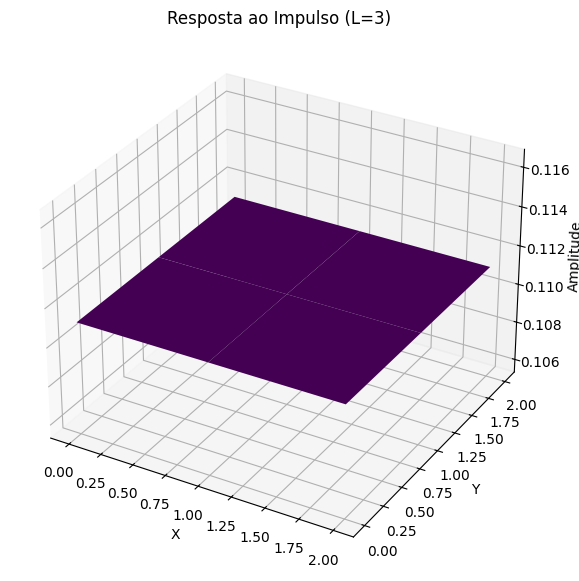

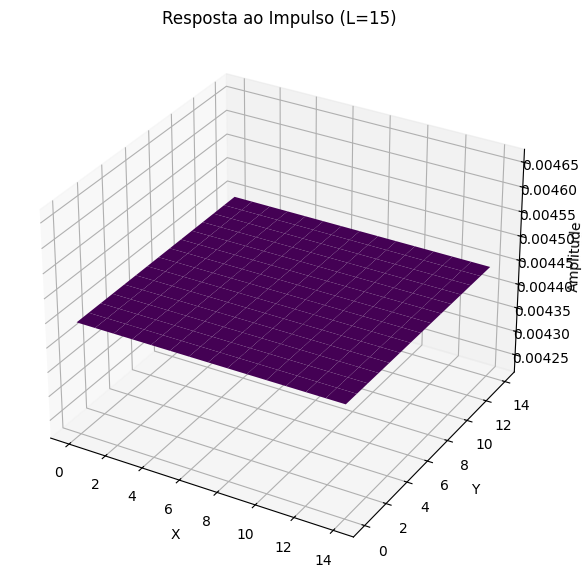

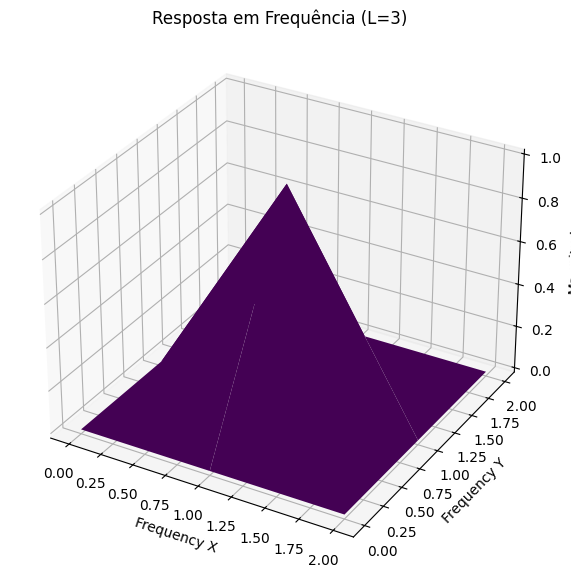

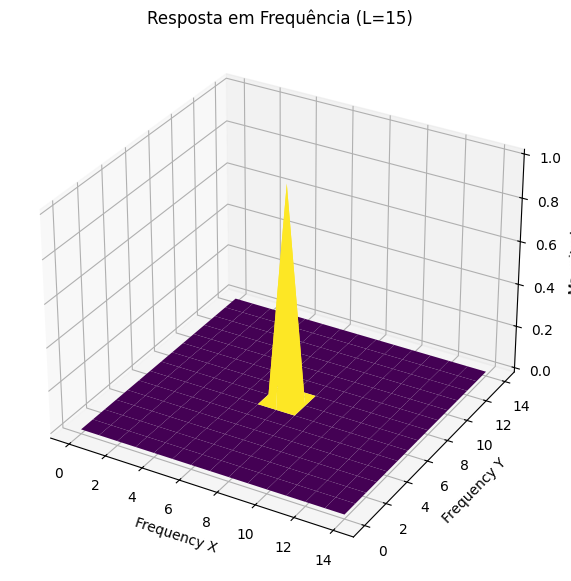

In [10]:
import numpy as np
from scipy.fftpack import fft2, fftshift

import matplotlib.pyplot as plt

def create_uniform_filter(L):
    return np.ones((L, L)) / (L * L)

def freqz2(b):
    w, h = fft2(b), fftshift(fft2(b))
    return w, h

def plot_3d_surface(Z, title, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(Z.shape[0]), range(Z.shape[1]))
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

def plot_frequency_response(filter_kernel, title):
    w, h = freqz2(filter_kernel)
    plot_3d_surface(np.abs(h), title, 'Frequency X', 'Frequency Y', 'Magnitude')

# Criar filtros uniformes para L=3 e L=15
filter_L3 = create_uniform_filter(3)
filter_L15 = create_uniform_filter(15)

# Exibir as respostas ao impulso
plot_3d_surface(filter_L3, 'Resposta ao Impulso (L=3)', 'X', 'Y', 'Amplitude')
plot_3d_surface(filter_L15, 'Resposta ao Impulso (L=15)', 'X', 'Y', 'Amplitude')

# Exibir as respostas em frequência
plot_frequency_response(filter_L3, 'Resposta em Frequência (L=3)')
plot_frequency_response(filter_L15, 'Resposta em Frequência (L=15)')

# comentarios 
* O filtro uniforme atua como um filtro passa-baixas, suavizando a imagem
* Quanto maior o valor de L, mais intenso é o efeito de suavização
A resposta em frequência mostra que o filtro L=15 é mais seletivo, removendo mais componentes de alta frequência que o L=3


2. Para os filtros da questão anterior, determine as respectivas respostas para uma dada imagem de entrada (em níveis de cinza, a sua escolha) utilizando a convolução bidimensional. Observe o resultado, compare com o resultado da questão anterior, e comente.

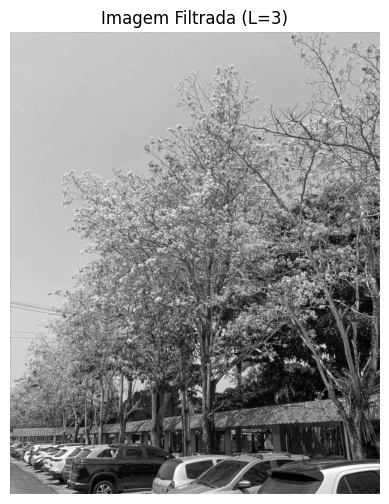

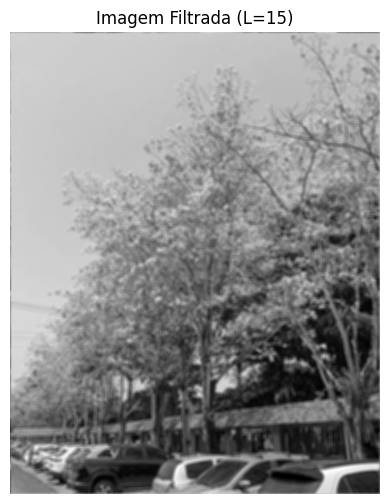

In [4]:
from scipy.signal import convolve2d
from PIL import Image

# Carregar a imagem de entrada em níveis de cinza
image_path = 'img_ufpa1_gray.jpg'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Aplicar a convolução bidimensional com os filtros L=3 e L=15
filtered_img_L3 = convolve2d(img_array, filter_L3, mode='same', boundary='wrap')
filtered_img_L15 = convolve2d(img_array, filter_L15, mode='same', boundary='wrap')

# Exibir as imagens filtradas
def display_image(image_array, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(filtered_img_L3, 'Imagem Filtrada (L=3)')
display_image(filtered_img_L15, 'Imagem Filtrada (L=15)')

# comentarios
* Na imagem com L=3 (primeiro filtro), o resultado mostra uma suavização leve da imagem, mantendo ainda boa parte dos detalhes como as árvores e os carros, apenas com um leve borramento.
* Na imagem com L=15 (segundo filtro), observa-se um borramento muito mais intenso, onde os detalhes ficam mais difusos, especialmente nas áreas dos carros e nas folhagens das árvores.

3. Repita as duas questões acima para o filtro gaussiano 2D com $\sigma = 3$ e $\sigma = 9$. A resposta ao impulso deve estar centrada na matriz de suporte, cujas dimensões devem ser suficientes para conter os elementos compreendidos no intervalo de $−5\sigma$ a $5\sigma$ em torno da média nas duas dimensões.

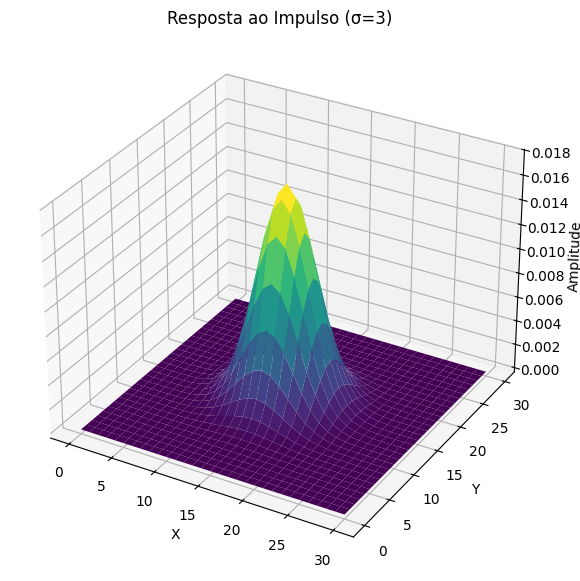

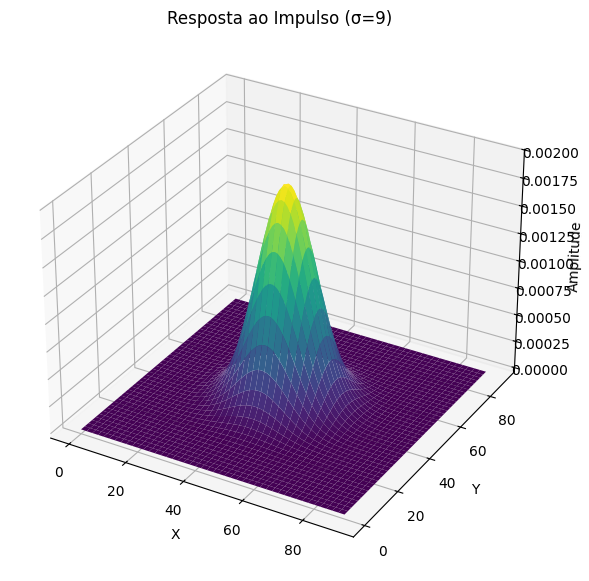

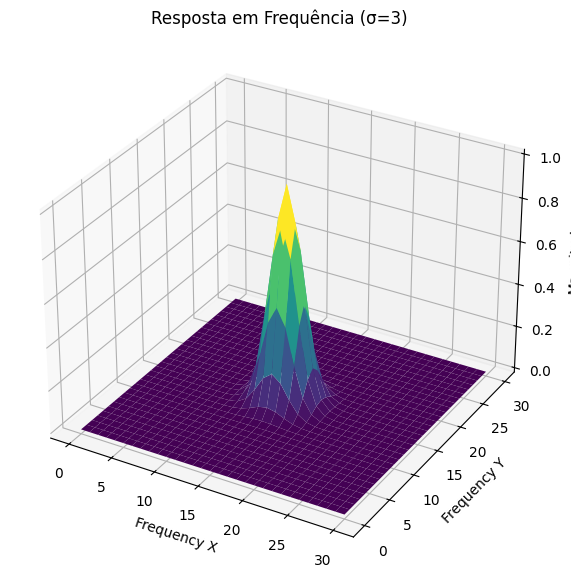

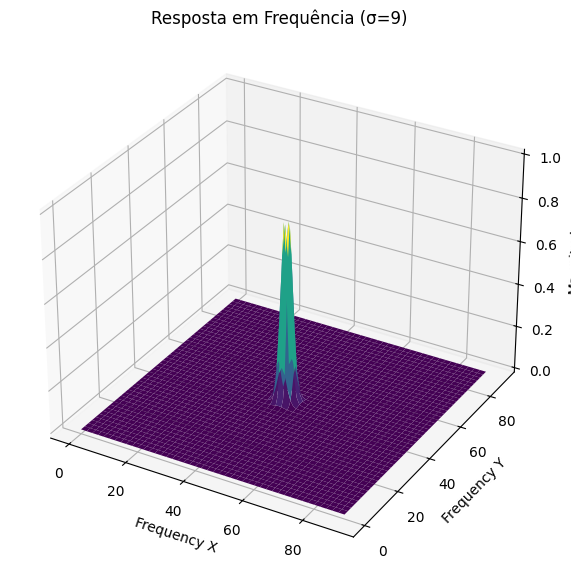

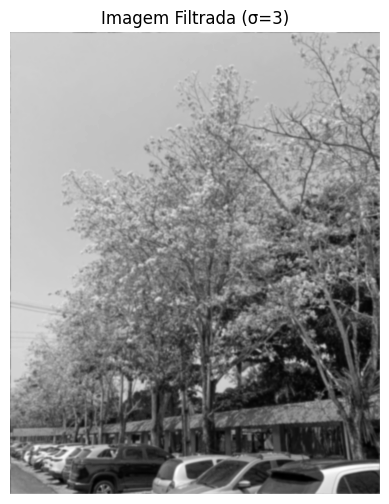

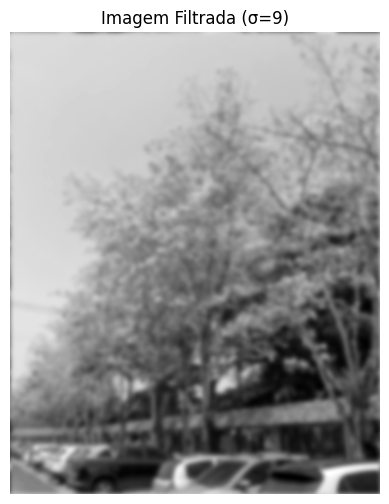

In [5]:
import numpy as np
from scipy.signal import convolve2d
from scipy.fftpack import fft2, fftshift
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

import matplotlib.pyplot as plt

def create_gaussian_filter(sigma):
    size = int(np.ceil(10 * sigma))
    if size % 2 == 0:
        size += 1
    center = size // 2
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
    gaussian_filter = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_filter /= np.sum(gaussian_filter)
    return gaussian_filter

def freqz2(b):
    w, h = fft2(b), fftshift(fft2(b))
    return w, h

def plot_3d_surface(Z, title, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(Z.shape[0]), range(Z.shape[1]))
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

def plot_frequency_response(filter_kernel, title):
    w, h = freqz2(filter_kernel)
    plot_3d_surface(np.abs(h), title, 'Frequency X', 'Frequency Y', 'Magnitude')

# Criar filtros gaussianos para sigma=3 e sigma=9
gaussian_filter_sigma3 = create_gaussian_filter(3)
gaussian_filter_sigma9 = create_gaussian_filter(9)

# Exibir as respostas ao impulso
plot_3d_surface(gaussian_filter_sigma3, 'Resposta ao Impulso (σ=3)', 'X', 'Y', 'Amplitude')
plot_3d_surface(gaussian_filter_sigma9, 'Resposta ao Impulso (σ=9)', 'X', 'Y', 'Amplitude')

# Exibir as respostas em frequência
plot_frequency_response(gaussian_filter_sigma3, 'Resposta em Frequência (σ=3)')
plot_frequency_response(gaussian_filter_sigma9, 'Resposta em Frequência (σ=9)')

# Carregar a imagem de entrada em níveis de cinza
image_path = 'img_ufpa1_gray.jpg'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Aplicar a convolução bidimensional com os filtros gaussianos
filtered_img_sigma3 = convolve2d(img_array, gaussian_filter_sigma3, mode='same', boundary='wrap')
filtered_img_sigma9 = convolve2d(img_array, gaussian_filter_sigma9, mode='same', boundary='wrap')

# Exibir as imagens filtradas
def display_image(image_array, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(filtered_img_sigma3, 'Imagem Filtrada (σ=3)')
display_image(filtered_img_sigma9, 'Imagem Filtrada (σ=9)')

# comentarios

a) Resposta ao Impulso:

Para σ=3: Apresenta uma distribuição gaussiana mais estreita e concentrada
Para σ=9: Mostra uma distribuição mais ampla e suave, ocupando maior área espacial

b) Resposta em Frequência:

Para σ=3: Apresenta uma banda passante mais larga, permitindo a passagem de mais frequências
Para σ=9: Mostra uma banda passante mais estreita, realizando um filtro passa-baixa mais severo

c) Imagens Filtradas:

σ=3: Mantém mais detalhes da imagem original, com suavização moderada
σ=9: Produz um efeito de borramento mais intenso, removendo mais detalhes finos

4. Gerar 20 imagens diferentes a partir de uma única imagem em tons de cinza por adição de
ruı́do gaussiano do tipo branco (ou seja, AWGN), todas com SNR = 5 dB. O objetivo é
reduzir o ruı́do usando: a) filtragem linear (Gaussiana 2D), b) filtro de mediana, e c) filtragem
estatı́stica (média aritmética pixel a pixel das 20 imagens). O ajuste dos parâmetros dos filtros
deve ser feito segundo o erro quadrático médio entre a imagem processada e a imagem de
referência (sem degradação).

MSE Gaussian Filtering: 1375.6124648239263
MSE Median Filtering: 56.45476435596936
MSE Mean Filtering: 1.9647279072864547


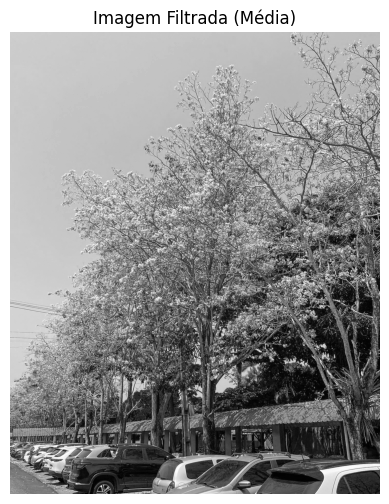

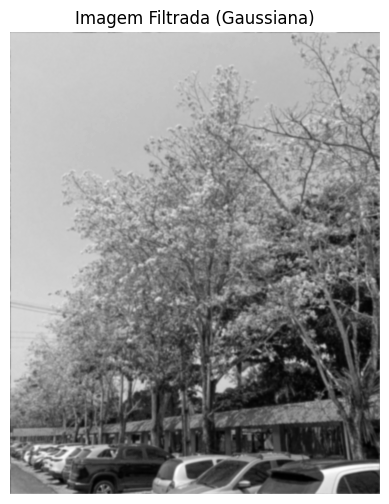

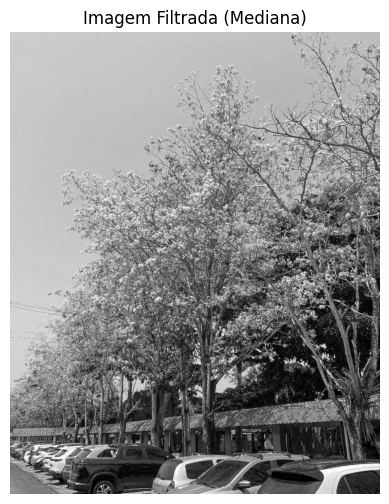

In [6]:
import numpy as np
from scipy.signal import convolve2d, medfilt2d
from PIL import Image

import matplotlib.pyplot as plt

def add_awgn_noise(image, snr_db):
    # Calculate signal power and noise power
    signal_power = np.mean(image ** 2)
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    
    # Generate Gaussian noise
    noise = np.random.normal(scale=np.sqrt(noise_power), size=image.shape)
    
    # Add noise to the image
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# Generate 20 noisy images
noisy_images = [add_awgn_noise(img_array, 5) for _ in range(20)]

# Apply Gaussian filtering
gaussian_filter = create_gaussian_filter(3)  # Adjust sigma as needed
gaussian_filtered_images = [convolve2d(noisy_image, gaussian_filter, mode='same', boundary='wrap') for noisy_image in noisy_images]

# Apply median filtering
median_filtered_images = [medfilt2d(noisy_image, kernel_size=3) for noisy_image in noisy_images]

# Apply statistical filtering (mean of the 20 images)
mean_filtered_image = np.mean(noisy_images, axis=0)

# Calculate MSE for each method
mse_gaussian = np.mean([calculate_mse(img_array, gaussian_filtered_image) for gaussian_filtered_image in gaussian_filtered_images])
mse_median = np.mean([calculate_mse(img_array, median_filtered_image) for median_filtered_image in median_filtered_images])
mse_mean = calculate_mse(img_array, mean_filtered_image)

# Display results
print(f'MSE Gaussian Filtering: {mse_gaussian}')
print(f'MSE Median Filtering: {mse_median}')
print(f'MSE Mean Filtering: {mse_mean}')

# Display images
def display_image(image_array, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(mean_filtered_image, 'Imagem Filtrada (Média)')
display_image(gaussian_filtered_images[0], 'Imagem Filtrada (Gaussiana)')
display_image(median_filtered_images[0], 'Imagem Filtrada (Mediana)')

# comentarios 
Resultados dos MSE (Mean Square Error):


Filtro Gaussiano: 1375.61
Filtro Mediana: 56.45
Filtro Média: 1.96

Observações importantes:

Comparação dos Filtros:


O filtro de média estatística (média das 20 imagens) apresentou o melhor desempenho com MSE = 1.96, significativamente menor que os outros métodos
O filtro de mediana teve desempenho intermediário (MSE = 56.45)
O filtro Gaussiano teve o pior desempenho (MSE = 1375.61)


Análise Visual das Imagens:


A imagem filtrada pela média parece mais nítida e com menos ruído
O filtro Gaussiano aparentemente suavizou demais a imagem, causando perda de detalhes
O filtro de mediana preservou melhor as bordas que o Gaussiano, mas ainda apresenta algum borramento

5. Crie uma rotina para degradar uma imagem com ruı́do do tipo sal (valor do pixel aleatório,
inteiro, distribuição uniforme no intervalo entre 230 e 255) e pimenta (valor do pixel aleatório,
inteiro, distribuição uniforme no intervalo entre 0 e 25). Parâmetro de entrada: percentual
dos pixels a serem corrompidos. Sal e pimenta ocorrem em proporções iguais (50% e 50%).
Tente melhorar a qualidade da imagem usando filtragem linear (2D uniforme, L à escolha) e
filtro de mediana (dimensões à escolha). Compare resultados e comente.

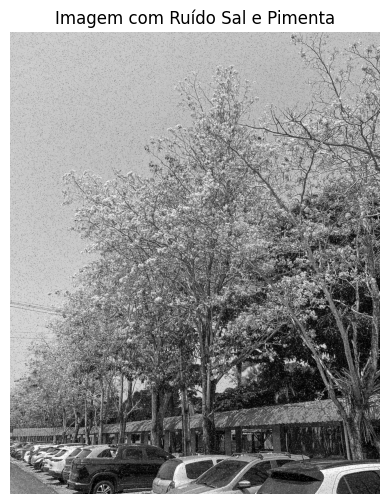

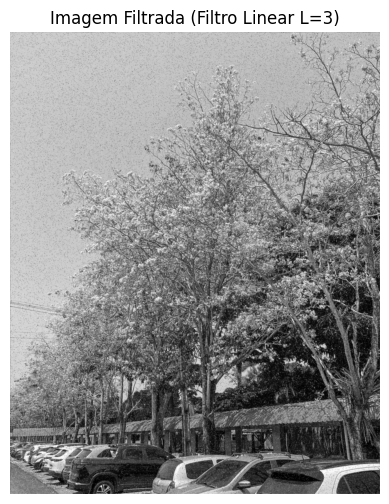

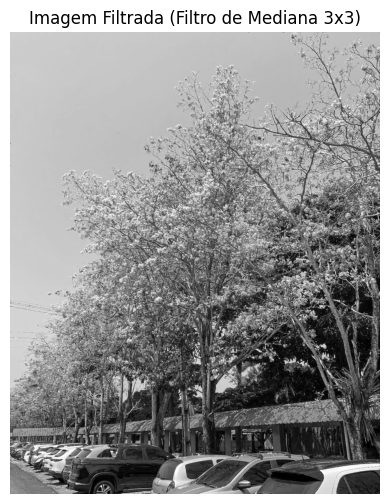

In [7]:
import numpy as np
from scipy.signal import convolve2d, medfilt2d
from PIL import Image

import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, percent):
    noisy_image = image.copy()
    num_salt = int(np.ceil(percent * image.size * 0.5))
    num_pepper = int(np.ceil(percent * image.size * 0.5))

    # Add salt noise
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = np.random.randint(230, 256, num_salt)

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = np.random.randint(0, 26, num_pepper)

    return noisy_image

def display_image(image_array, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Add salt-and-pepper noise to the image
percent_noise = 0.05  # 5% of the pixels will be corrupted
noisy_img = add_salt_and_pepper_noise(img_array, percent_noise)

# Apply linear filtering (2D uniform filter, L=3)
filtered_img_linear = convolve2d(noisy_img, filter_L3, mode='same', boundary='wrap')

# Apply median filtering (kernel size 3x3)
filtered_img_median = medfilt2d(noisy_img, kernel_size=3)

# Display the images
display_image(noisy_img, 'Imagem com Ruído Sal e Pimenta')
display_image(filtered_img_linear, 'Imagem Filtrada (Filtro Linear L=3)')
display_image(filtered_img_median, 'Imagem Filtrada (Filtro de Mediana 3x3)')

# comentarios
Imagem com Ruído Sal e Pimenta:


A primeira imagem mostra o resultado da adição do ruído sal e pimenta
É possível observar pontos brancos (sal - valores entre 230-255) e pontos pretos (pimenta - valores entre 0-25)
O ruído está bem distribuído pela imagem, afetando 5% dos pixels (percent_noise = 0.05)


Imagem com Filtro Linear (L=3):


O filtro linear (média) suaviza a imagem
Reduz parcialmente o ruído, mas causa um leve borramento na imagem
As bordas dos objetos e detalhes finos ficam menos nítidos
Não é tão eficiente para ruído sal e pimenta porque a média é sensível a valores extremos


Imagem com Filtro de Mediana (3x3):


O filtro de mediana apresenta resultados superiores para este tipo de ruído
Remove efetivamente os pontos de ruído sal e pimenta
Preserva melhor as bordas e detalhes da imagem
É mais adequado para este tipo específico de ruído

6. Refaça a operação de filtragem gaussiana da questão 3 no domı́nio da frequência, comparando
os resultados obtidos.

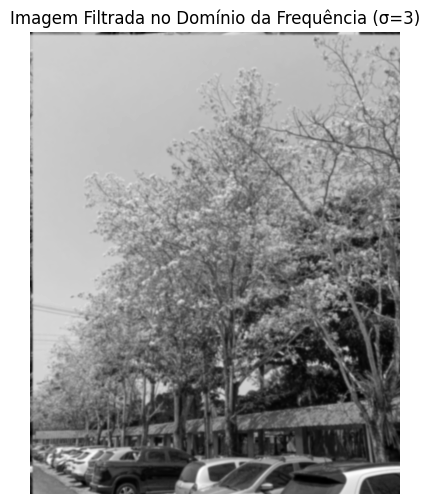

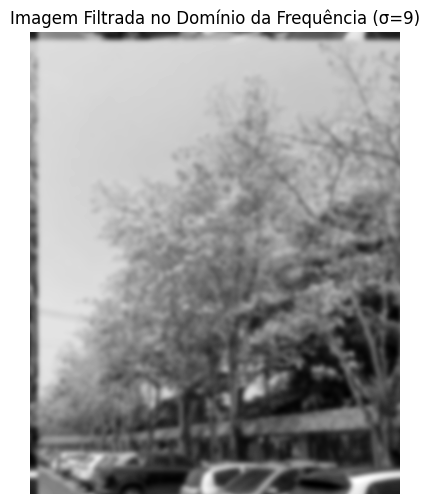

In [9]:
from scipy.fftpack import fft2, ifft2, fftshift
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

def create_gaussian_filter(sigma, size):
    center = size // 2
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
    gaussian_filter = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_filter /= np.sum(gaussian_filter)
    return gaussian_filter

def apply_frequency_domain_filtering(image_array, filter_kernel):
    # Compute the Fourier transform of the image
    image_fft = fft2(image_array)
    
    # Compute the Fourier transform of the filter
    filter_fft = fft2(filter_kernel, shape=image_array.shape)
    
    # Multiply the Fourier transforms
    filtered_fft = image_fft * filter_fft
    
    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.real(ifft2(filtered_fft))
    
    return filtered_image

def display_image(image_array, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Carregar a imagem de entrada em níveis de cinza
image_path = 'img_ufpa1_gray.jpg'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Criar filtros gaussianos para sigma=3 e sigma=9
gaussian_filter_sigma3 = create_gaussian_filter(3, size=21)
gaussian_filter_sigma9 = create_gaussian_filter(9, size=61)

# Aplicar a filtragem no domínio da frequência
filtered_img_sigma3_freq = apply_frequency_domain_filtering(img_array, gaussian_filter_sigma3)
filtered_img_sigma9_freq = apply_frequency_domain_filtering(img_array, gaussian_filter_sigma9)

# Exibir as imagens filtradas
display_image(filtered_img_sigma3_freq, 'Imagem Filtrada no Domínio da Frequência (σ=3)')
display_image(filtered_img_sigma9_freq, 'Imagem Filtrada no Domínio da Frequência (σ=9)')

# comentarios 
* Para σ=3: A imagem mantém boa parte dos detalhes, com uma suavização moderada, similar ao resultado obtido no domínio espacial
* Para σ=9: Apresenta um borramento mais intenso, com maior perda de detalhes finos, também similar ao resultado espacial